In [ ]:
# Install any missing libraries (if needed)
!pip install mlxtend scikit-learn
!pip install tensorflow
!pip install torch
!pip install pyECLAT
!pip install google-colab
!pip install google-api-python-client
!pip install gdown


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


ERROR: Could not find a version that satisfies the requirement google-colab (from versions: none)
ERROR: No matching distribution found for google-colab


In [ ]:
import zipfile
import os

# Local path to the ZIP file
dataset_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis.zip'  # Make sure this is the correct path to your ZIP file

# Unzip the file using the local dataset path
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("instacart")  # Extracts to a folder named 'instacart' in the current working directory

# Optional: Verify if the files were extracted properly by listing the directory
extracted_files = os.listdir('instacart')
print("Extracted files:", extracted_files)


Extracted files: ['aisles.csv', 'departments.csv', 'orders.csv', 'order_products__prior.csv', 'order_products__train.csv', 'products.csv']


In [ ]:
import pandas as pd

# Local paths to the CSV files
base_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'  # Base path where the CSV files are located

orders_path = f'{base_path}\orders.csv'
order_products_prior_path = f'{base_path}\order_products__prior.csv'
products_path = f'{base_path}\products.csv'

# Load necessary CSV files with only required columns to save memory
orders = pd.read_csv(orders_path, usecols=['order_id', 'user_id'])
order_products_prior = pd.read_csv(order_products_prior_path, usecols=['order_id', 'product_id'])
products = pd.read_csv(products_path, usecols=['product_id', 'product_name'])

# Display the first few rows of each dataframe to verify the data
print(orders.head())
print(order_products_prior.head())
print(products.head())


<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\user\AppData\Local\Temp\ipykernel_23436\1861834835.py:6: SyntaxWarning: invalid escape sequence '\o'
  orders_path = f'{base_path}\orders.csv'
C:\Users\user\AppData\Local\Temp\ipykernel_23436\1861834835.py:7: SyntaxWarning: invalid escape sequence '\o'
  order_products_prior_path = f'{base_path}\order_products__prior.csv'
C:\Users\user\AppData\Local\Temp\ipykernel_23436\1861834835.py:8: SyntaxWarning: invalid escape sequence '\p'
  products_path = f'{base_path}\products.csv'


   order_id  user_id
0   2539329        1
1   2398795        1
2    473747        1
3   2254736        1
4    431534        1
   order_id  product_id
0         2       33120
1         2       28985
2         2        9327
3         2       45918
4         2       30035
   product_id                                       product_name
0           1                         Chocolate Sandwich Cookies
1           2                                   All-Seasons Salt
2           3               Robust Golden Unsweetened Oolong Tea
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...
4           5                          Green Chile Anytime Sauce


In [ ]:
# Merge the datasets to include only necessary information for ARM
merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

# Optional: Sample or filter for specific categories or top N products
# For example, filtering for top 100 most popular products:
top_products = order_products_prior['product_id'].value_counts().nlargest(100).index
filtered_merged = merged[merged['product_id'].isin(top_products)]

# Grouping products purchased in each order into lists
grouped = filtered_merged.groupby('order_id')['product_name'].apply(list)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming 'grouped' is your list of products per order
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
sparse_matrix = csr_matrix(te_ary)
df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# Applying Apriori with a lower minimum support
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=3, low_memory=True)

# Generating association rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Display the top rules sorted by confidence
if not rules.empty:
    print(rules.sort_values('confidence', ascending=False).head())
else:
    print("No rules found. Consider lowering your support and confidence thresholds.")


C:\Users\user\AppData\Local\Temp\ipykernel_23436\474629139.py:10: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)


              antecedents consequents  antecedent support  consequent support  \
26   (Organic Fuji Apple)    (Banana)            0.038121            0.200985   
16     (Honeycrisp Apple)    (Banana)            0.033926            0.200985   
14       (Cucumber Kirby)    (Banana)            0.041389            0.200985   
22      (Organic Avocado)    (Banana)            0.075201            0.200985   
35  (Seedless Red Grapes)    (Banana)            0.035168            0.200985   

     support  confidence      lift  leverage  conviction  zhangs_metric  
26  0.014436    0.378693  1.884181  0.006774    1.286022       0.487863  
16  0.012082    0.356128  1.771911  0.005263    1.240953       0.450936  
14  0.013651    0.329826  1.641043  0.005333    1.192249       0.407497  
22  0.022709    0.301982  1.502508  0.007595    1.144691       0.361642  
35  0.010460    0.297428  1.479847  0.003392    1.137270       0.336074  


In [ ]:
# import pandas as pd
# from scipy.sparse import csr_matrix
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # Assuming 'grouped' is already defined as your list of transactions
# te = TransactionEncoder()
# te_ary = te.fit_transform(grouped)
# sparse_matrix = csr_matrix(te_ary)
# df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# # Testing different thresholds for support and confidence
# for support in [0.01, 0.02, 0.03]:  # Adjust these values as needed
#     for confidence in [0.05, 0.1, 0.15]:  # Adjust these values as needed
#         frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
#         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
#         print(f"Support: {support}, Confidence: {confidence}, Rules Generated: {len(rules)}")
#         if not rules.empty:
#             print(rules.sort_values('confidence', ascending=False).head())


In [ ]:
# import pandas as pd
# from scipy.sparse import csr_matrix
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # Assuming 'grouped' is already defined as your list of transactions
# te = TransactionEncoder()
# te_ary = te.fit_transform(grouped)
# sparse_matrix = csr_matrix(te_ary)
# df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# # Define an empty DataFrame to collect all rules
# all_rules = pd.DataFrame()

# # Testing different thresholds for support and confidence
# for support in [0.01, 0.02, 0.03]:  # Adjust these values as needed
#     for confidence in [0.05, 0.1, 0.15]:  # Adjust these values as needed
#         frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
#         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
#         if not rules.empty:
#             all_rules = pd.concat([all_rules, rules], ignore_index=True)

# # Save all rules to a CSV file
# all_rules.to_csv('/content/drive/MyDrive/Dissertation Preparation (masters)/MBA/association_rules.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_23436\686063859.py:11: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)


              antecedents           consequents  antecedent support  \
27            Large Lemon                 Limes            0.064926   
66            Large Lemon                 Limes            0.064926   
26                  Limes           Large Lemon            0.059810   
65                  Limes           Large Lemon            0.059810   
43    Organic Raspberries  Organic Strawberries            0.058291   
..                    ...                   ...                 ...   
137  Organic Strawberries                Banana            0.112572   
158  Organic Strawberries                Banana            0.112572   
149                Banana  Organic Strawberries            0.200985   
164  Organic Strawberries                Banana            0.112572   
20   Organic Hass Avocado                Banana            0.090839   

     consequent support   support  confidence      lift  leverage  conviction  
27             0.059810  0.011655    0.179507  3.001302  0.007771  

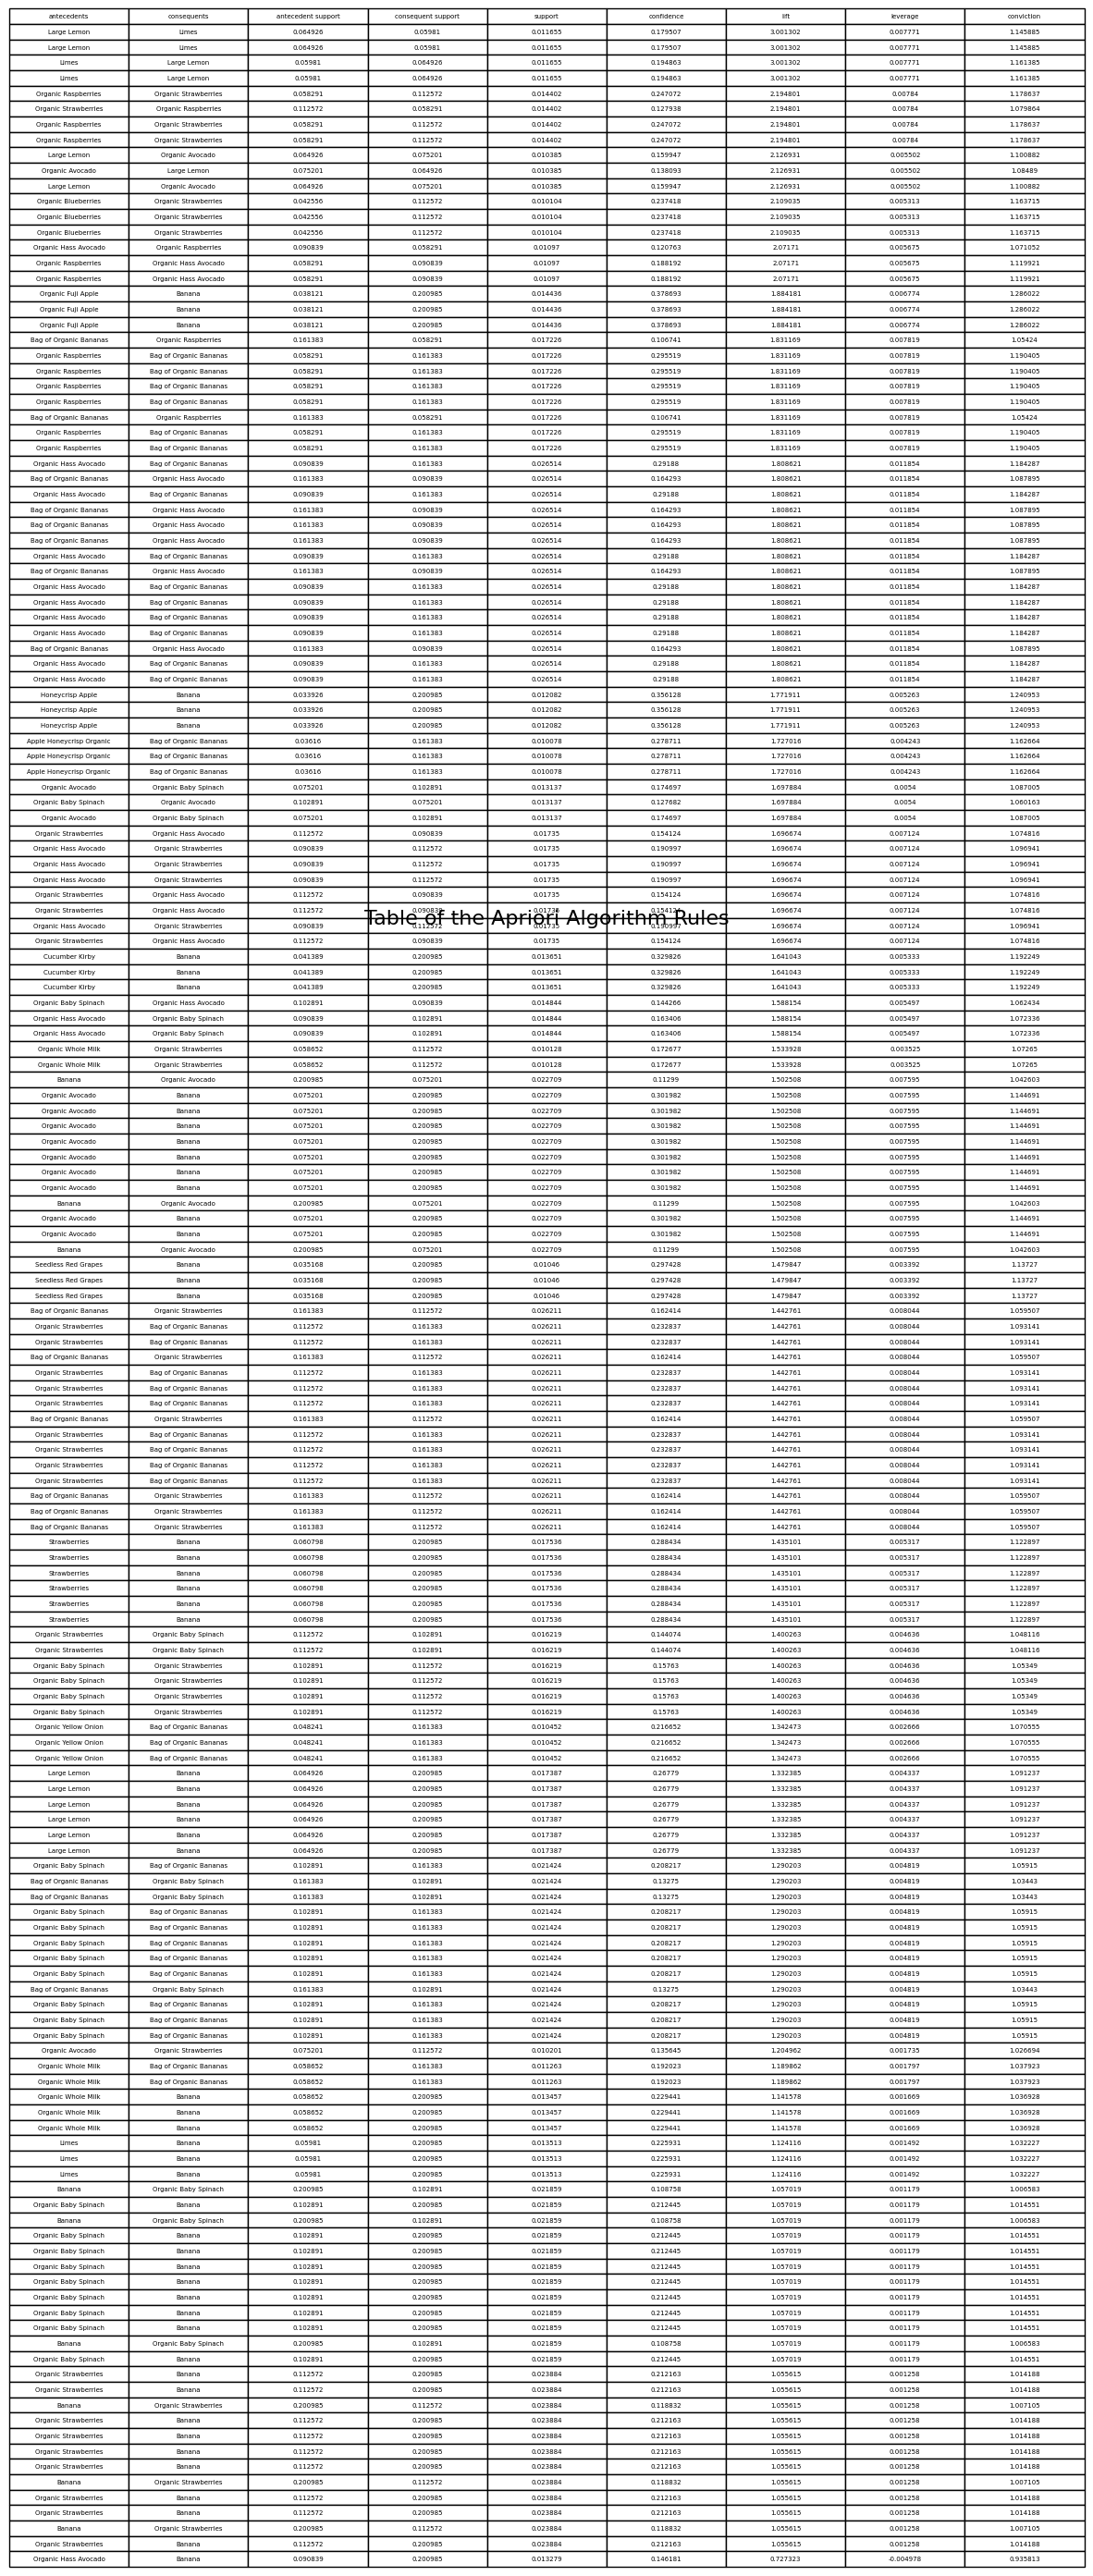

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Assuming 'grouped' is already defined as your list of transactions
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
sparse_matrix = csr_matrix(te_ary)
df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# Define an empty DataFrame to store all the rules
all_rules = pd.DataFrame()

# Testing different thresholds for support and confidence
for support in [0.01, 0.015, 0.02]:  # Adjust these values as needed
    for confidence in [0.1, 0.15, 0.2]:  # Adjust these values as needed
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        if not rules.empty:
            # Concatenate all rules found for this set of thresholds
            all_rules = pd.concat([all_rules, rules], ignore_index=True)

# Now that we have the optimized results, let's format the table similar to the one in the image
# Select and rename relevant columns for clarity
all_rules = all_rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                       'support', 'confidence', 'lift', 'leverage', 'conviction']]

# Convert 'antecedents' and 'consequents' from frozensets to strings for better readability
all_rules['antecedents'] = all_rules['antecedents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules['consequents'] = all_rules['consequents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format

# Sort by 'lift' and round values to match the format of the image
all_rules = all_rules.sort_values(by='lift', ascending=False).round(6)

# Display the formatted table using pandas
print(all_rules)

# Save the CSV file locally
csv_path = r'C:\Users\user\Desktop\cw\MBA\optimized_association_rules.csv'
all_rules.to_csv(csv_path, index=False)

# Display the table as in the image using matplotlib
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.table(cellText=all_rules.values, colLabels=all_rules.columns, loc='center', cellLoc='center')
plt.title("Table of the Apriori Algorithm Rules", fontsize=16)
plt.show()


              antecedents          consequents  antecedent support  \
43            Large Lemon                Limes            0.064926   
75            Large Lemon                Limes            0.064926   
74                  Limes          Large Lemon            0.059810   
42                  Limes          Large Lemon            0.059810   
17   Organic Strawberries  Organic Raspberries            0.112572   
..                    ...                  ...                 ...   
134  Organic Strawberries               Banana            0.112572   
155  Organic Strawberries               Banana            0.112572   
146  Organic Strawberries               Banana            0.112572   
162  Organic Strawberries               Banana            0.112572   
8    Organic Hass Avocado               Banana            0.090839   

     consequent support   support  confidence      lift  leverage  conviction  
43             0.059810  0.011655    0.179507  3.001302  0.007771    1.145885  

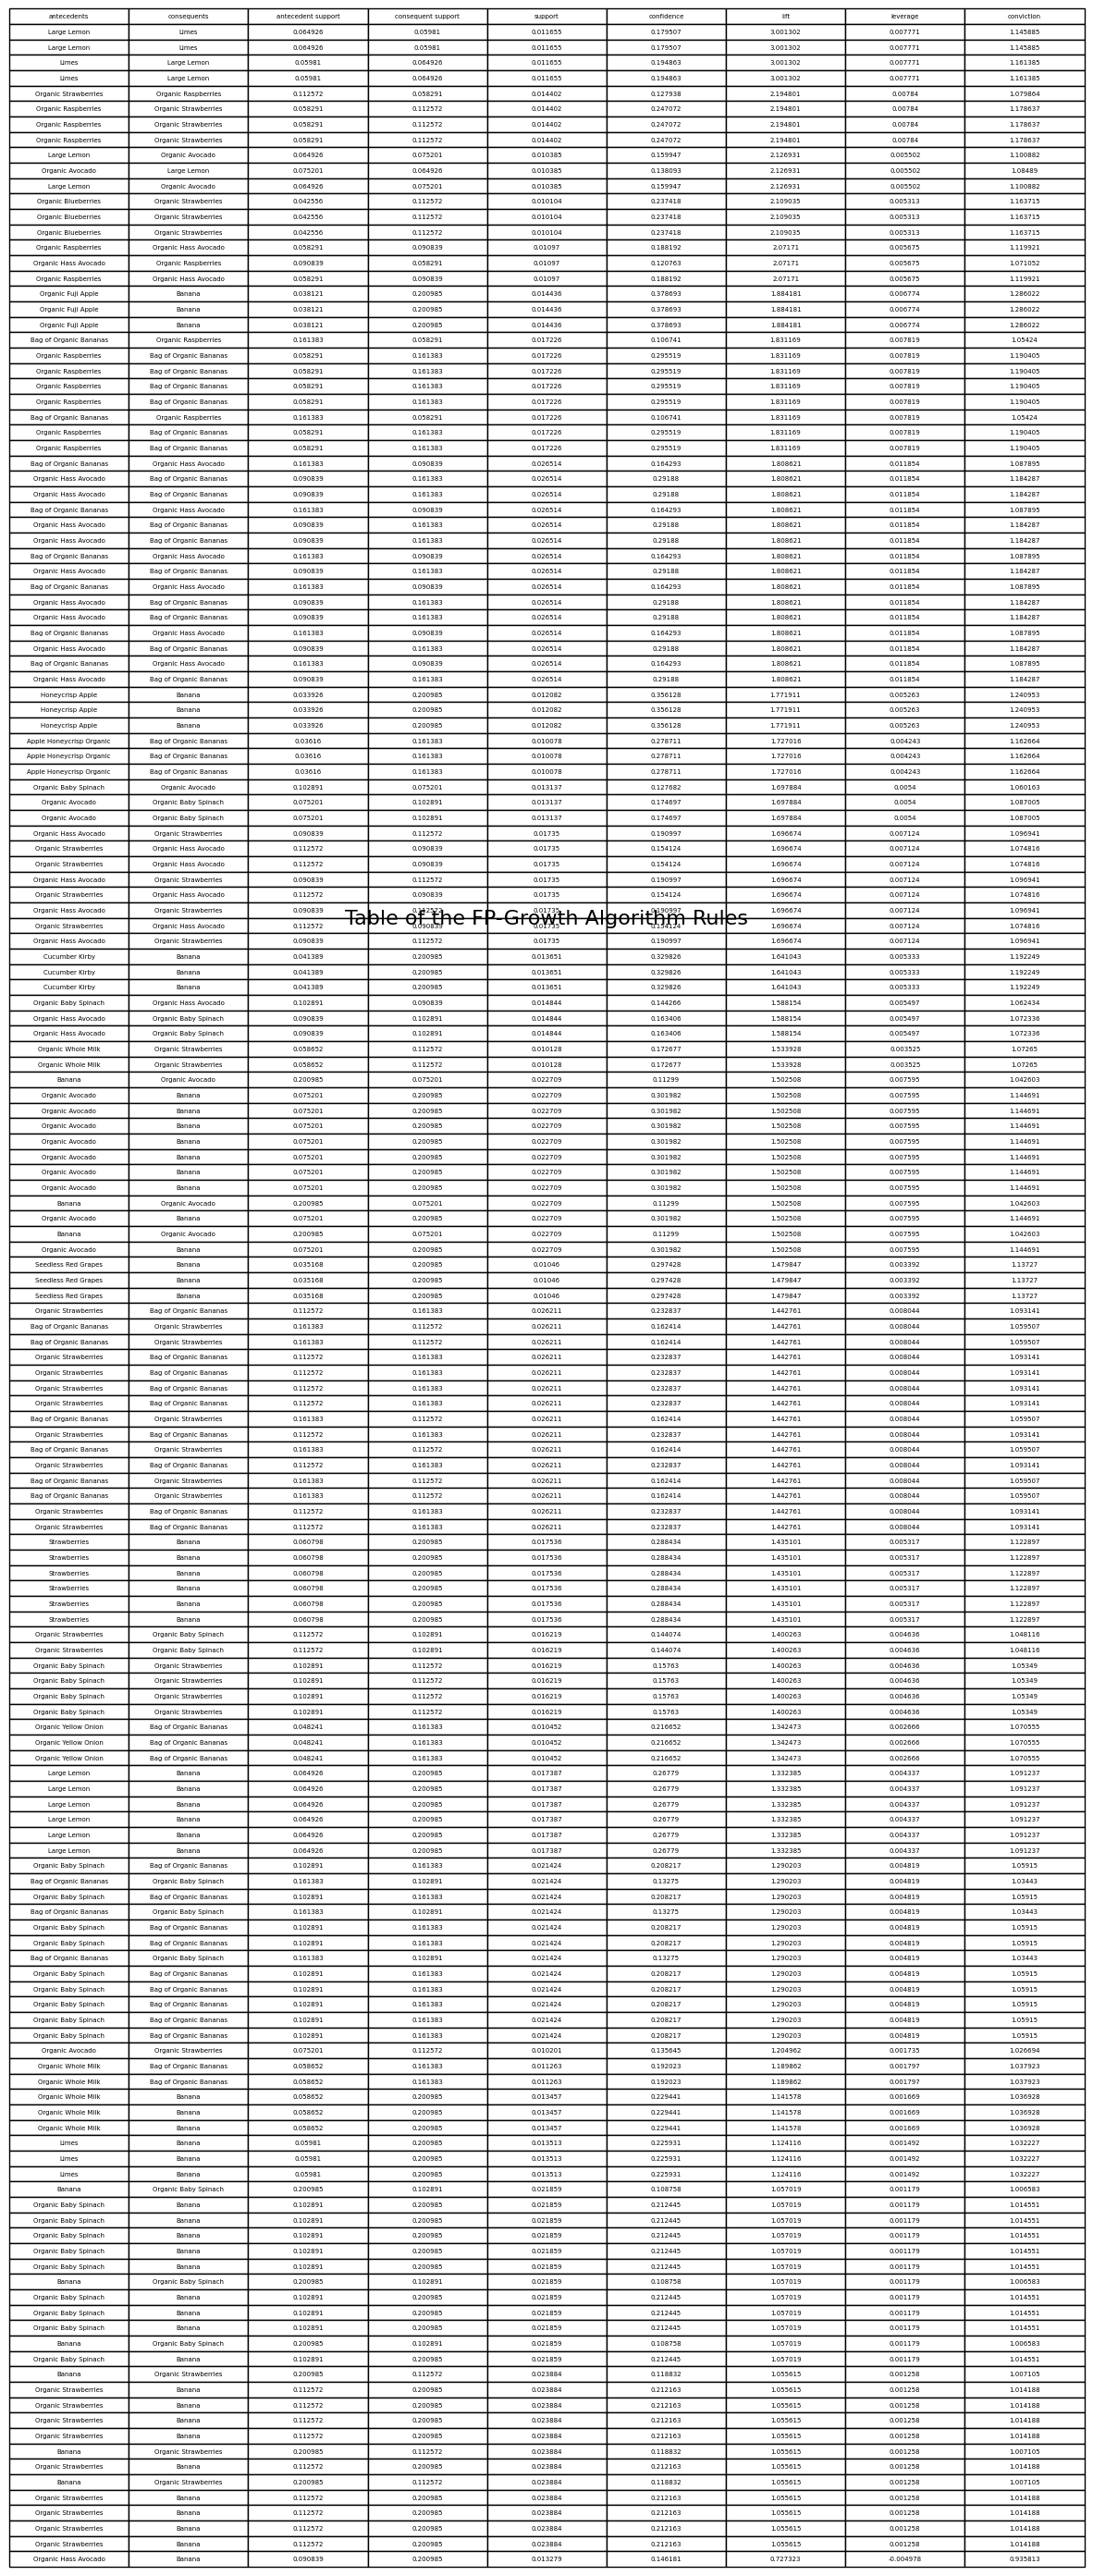

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt

# Assuming 'df' is already defined as your binary matrix of transactions
# Define an empty DataFrame to store all the FP-Growth rules
all_rules_fp = pd.DataFrame()

# Testing different thresholds for support and confidence
for support in [0.01, 0.015, 0.02]:  # Adjust these values as needed
    for confidence in [0.1, 0.15, 0.2]:  # Adjust these values as needed
        frequent_itemsets_fp = fpgrowth(df, min_support=support, use_colnames=True)
        rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=confidence)
        if not rules_fp.empty:
            # Concatenate all rules found for this set of thresholds
            all_rules_fp = pd.concat([all_rules_fp, rules_fp], ignore_index=True)

# Select and rename relevant columns for clarity
all_rules_fp = all_rules_fp[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                             'support', 'confidence', 'lift', 'leverage', 'conviction']]

# Convert 'antecedents' and 'consequents' from frozensets to strings for better readability
all_rules_fp['antecedents'] = all_rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules_fp['consequents'] = all_rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format

# Sort by 'lift' and round values to match the format
all_rules_fp = all_rules_fp.sort_values(by='lift', ascending=False).round(6)

# Display the formatted table using pandas
print(all_rules_fp)

# Save the CSV file locally
csv_path_fp = r'C:\Users\user\Desktop\cw\MBA\optimized_fp_growth_rules.csv'
all_rules_fp.to_csv(csv_path_fp, index=False)

# Display the table using matplotlib
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.table(cellText=all_rules_fp.values, colLabels=all_rules_fp.columns, loc='center', cellLoc='center')
plt.title("Table of the FP-Growth Algorithm Rules", fontsize=16)
plt.show()


            support  confidence      lift  rule_count
algorithm                                            
Apriori    0.018764    0.220134  1.540279         165
FP-Growth  0.018764    0.220134  1.540279         165


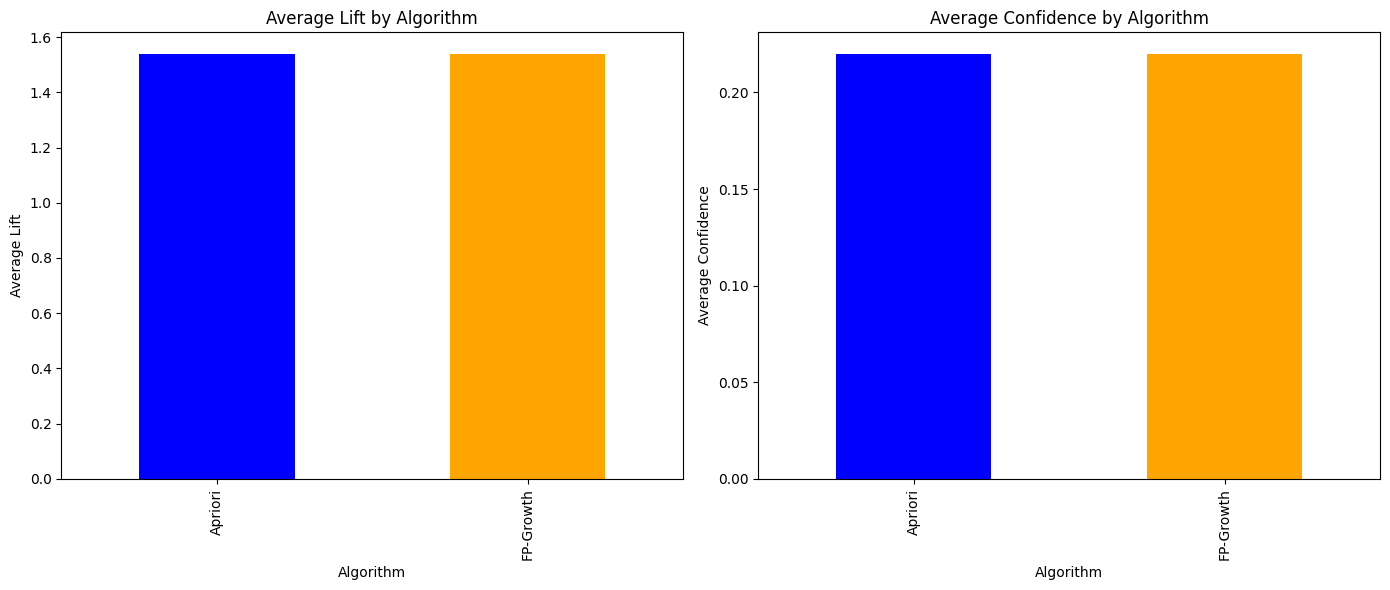

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'all_rules' contains the Apriori results and 'all_rules_fp' contains the FP-Growth results

# Add a column to each DataFrame to indicate the algorithm used
all_rules['algorithm'] = 'Apriori'
all_rules_fp['algorithm'] = 'FP-Growth'

# Combine the two DataFrames for easy comparison
combined_rules = pd.concat([all_rules, all_rules_fp], ignore_index=True)

# Display summary statistics for both algorithms
summary = combined_rules.groupby('algorithm').agg({
    'support': 'mean',
    'confidence': 'mean',
    'lift': 'mean',
    'antecedents': 'count'
}).rename(columns={'antecedents': 'rule_count'})

print(summary)

# Plotting the comparison of lift and confidence by algorithm
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot average lift
summary['lift'].plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Average Lift by Algorithm')
axes[0].set_ylabel('Average Lift')
axes[0].set_xlabel('Algorithm')

# Plot average confidence
summary['confidence'].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Average Confidence by Algorithm')
axes[1].set_ylabel('Average Confidence')
axes[1].set_xlabel('Algorithm')

plt.tight_layout()
plt.show()


In [ ]:
import time
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the local path where files will be saved
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'

# Measure the time to load the CSV files
start_time = time.time()

# Load the CSV files from the local directory
orders = pd.read_csv(os.path.join(local_path, 'orders.csv'), usecols=['order_id', 'user_id'])
order_products_prior = pd.read_csv(os.path.join(local_path, 'order_products__prior.csv'), usecols=['order_id', 'product_id'])
products = pd.read_csv(os.path.join(local_path, 'products.csv'), usecols=['product_id', 'product_name'])

merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

print(f"Time to load and merge data: {time.time() - start_time:.2f} seconds")

# Step 1: Define a function to create mini-batches
start_time = time.time()
top_n = 100  # Adjust the number based on available memory and desired product focus
top_products = merged['product_id'].value_counts().nlargest(top_n).index
filtered_merged = merged[merged['product_id'].isin(top_products)]
grouped_filtered = filtered_merged.groupby('order_id')['product_name'].apply(list).tolist()

print(f"Time to filter and group data: {time.time() - start_time:.2f} seconds")

# Step 2: Encode the transactions using the filtered product set
start_time = time.time()
te_filtered = TransactionEncoder()
te_ary_filtered = te_filtered.fit_transform(grouped_filtered)
sparse_matrix_filtered = csr_matrix(te_ary_filtered)
df_filtered_sparse = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_filtered, columns=te_filtered.columns_)

print(f"Time to encode transactions: {time.time() - start_time:.2f} seconds")

# Step 3: Split the filtered transactions into training and testing sets
start_time = time.time()
train_transactions, test_transactions = train_test_split(grouped_filtered, test_size=0.2, random_state=42)
user_transactions = {i: t for i, t in enumerate(train_transactions)}
test_transactions_dict = {i: t for i, t in enumerate(test_transactions)}

print(f"Time to split data: {time.time() - start_time:.2f} seconds")

# Step 4: Generate rules using Apriori and FP-Growth
def generate_rules(algorithm, df, support, confidence, max_len=3):
    start_time = time.time()
    if algorithm == 'apriori':
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=max_len, low_memory=True)
    elif algorithm == 'fp_growth':
        frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True, max_len=max_len)
    else:
        raise ValueError("Algorithm must be 'apriori' or 'fp_growth'")

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(x))
    rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(x))

    print(f"Time to generate {algorithm} rules: {time.time() - start_time:.2f} seconds")
    return rules

all_rules = generate_rules('apriori', df_filtered_sparse, support=0.01, confidence=0.1, max_len=2)
all_rules_fp = generate_rules('fp_growth', df_filtered_sparse, support=0.01, confidence=0.1, max_len=2)

# Step 5: Generate recommendations based on the rules
def generate_recommendations_optimized(rules_df, user_transactions, k=5):
    start_time = time.time()
    recommendations = {}
    antecedents_dict = rules_df.groupby('antecedents')['consequents'].apply(list).to_dict()

    for user_id, products in user_transactions.items():
        product_set = set(products)
        recommended_products = []

        for antecedent, consequents_list in antecedents_dict.items():
            if antecedent.issubset(product_set):
                for consequents in consequents_list:
                    recommended_products.extend(consequents)

        recommended_products = [p for p in recommended_products if p not in product_set]
        recommendations[user_id] = list(pd.Series(recommended_products).value_counts().index[:k])

    print(f"Time to generate recommendations: {time.time() - start_time:.2f} seconds")
    return recommendations

recommendations_apriori = generate_recommendations_optimized(all_rules, user_transactions, k=5)
recommendations_fp_growth = generate_recommendations_optimized(all_rules_fp, user_transactions, k=5)

# Step 6: Evaluate the recommendations
def evaluate_recommendations(recommendations, test_transactions, k=5):
    total_precision = 0
    total_recall = 0
    hits = 0
    total_users = len(recommendations)

    for user_id, recs in recommendations.items():
        if user_id in test_transactions:
            actual_products = set(test_transactions[user_id])
            recommended_products = set(recs[:k])

            # Precision@K: Fraction of recommended items that are relevant
            precision = len(recommended_products.intersection(actual_products)) / k
            # Recall@K: Fraction of relevant items that are recommended
            recall = len(recommended_products.intersection(actual_products)) / len(actual_products)
            # Hit Rate: Whether at least one of the recommended items is relevant
            hit = 1 if len(recommended_products.intersection(actual_products)) > 0 else 0

            total_precision += precision
            total_recall += recall
            hits += hit

    # Calculate average metrics
    precision_at_k = total_precision / total_users
    recall_at_k = total_recall / total_users
    hit_rate = hits / total_users

    return {
        'Precision@K': precision_at_k,
        'Recall@K': recall_at_k,
        'Hit Rate': hit_rate
    }

# Evaluate the recommendations for both algorithms
results_apriori = evaluate_recommendations(recommendations_apriori, test_transactions_dict, k=5)
results_fp_growth = evaluate_recommendations(recommendations_fp_growth, test_transactions_dict, k=5)

# Display results
print("Apriori Results:", results_apriori)
print("FP-Growth Results:", results_fp_growth)

# Measure overall runtime
total_runtime = time.time() - start_time
print(f"Total runtime for the entire process: {total_runtime:.2f} seconds")


Time to load and merge data: 11.36 seconds
Time to filter and group data: 39.91 seconds


C:\Users\user\AppData\Local\Temp\ipykernel_23436\1714892854.py:40: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_filtered_sparse = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_filtered, columns=te_filtered.columns_)


Time to encode transactions: 1.90 seconds
Time to split data: 1.17 seconds
Time to generate apriori rules: 6.60 seconds
Time to generate fp_growth rules: 20.61 seconds
Time to generate recommendations: 301.95 seconds
Time to generate recommendations: 303.16 seconds
Apriori Results: {'Precision@K': 0.014981562920019448, 'Recall@K': 0.024832151167563217, 'Hit Rate': 0.062226739932971536}
FP-Growth Results: {'Precision@K': 0.01498347680375734, 'Recall@K': 0.024826319094814427, 'Hit Rate': 0.06218048774263793}
Total runtime for the entire process: 634.91 seconds


In [ ]:
import pandas as pd
import zipfile
import os

# CPU Optimization Settings
os.environ['OMP_NUM_THREADS'] = '16'
os.environ['TF_NUM_INTRA_OP_PARALLELISM_THREADS'] = '16'
os.environ['TF_NUM_INTER_OP_PARALLELISM_THREADS'] = '8'

# Debugging file paths
local_path = r"C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis"

# Verify file paths
print("Verifying file paths...")
if os.path.exists(local_path):
    print("Path exists.")
    print("Files in path:", os.listdir(local_path))
else:
    raise FileNotFoundError(f"Path does not exist: {local_path}")

# Load files directly to test access
orders_path = os.path.join(local_path, "orders.csv")
order_products_prior_path = os.path.join(local_path, "order_products__prior.csv")
products_path = os.path.join(local_path, "products.csv")

try:
    orders = pd.read_csv(orders_path, usecols=['order_id', 'user_id'])
    print("Orders file loaded successfully.")
    order_products_prior = pd.read_csv(order_products_prior_path, usecols=['order_id', 'product_id'])
    print("Order Products Prior file loaded successfully.")
    products = pd.read_csv(products_path, usecols=['product_id', 'product_name'])
    print("Products file loaded successfully.")
except FileNotFoundError as e:
    print("File not found:", e)
    raise

# Merge the datasets to include only necessary information for ARM
merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

# Data Cleaning
merged.dropna(inplace=True)  # Ensure there are no missing values
merged['product_name'] = merged['product_name'].str.strip()  # Strip whitespace from product names

# Aggressive Filtering: Top 50 products and small orders
top_products = merged['product_name'].value_counts().nlargest(50).index
filtered_merged = merged[merged['product_name'].isin(top_products)]
filtered_merged = filtered_merged.groupby('order_id').filter(lambda x: len(x) <= 10)  # Orders with <= 10 items

# Grouping products purchased in each order into lists
grouped = filtered_merged.groupby('order_id')['product_name'].apply(list)

# Prepare transaction data for further analysis
transaction_list = grouped.tolist()

# Split Data into Training and Testing
train_size = int(len(transaction_list) * 0.8)
train_data = transaction_list[:train_size]
test_data = transaction_list[train_size:]

print("Prepared training and testing datasets.")


Verifying file paths...
Path exists.
Files in path: ['aisles.csv', 'apriori_recommendations.csv', 'apriori_rules.csv', 'bert4recO1_results.csv', 'bert4rec_results.csv', 'bert4rec_resultsO2.csv', 'departments.csv', 'fp_growth_recommendations.csv', 'fp_growth_rules.csv', 'gru4recNO1_results.csv', 'gru4rec_resultsNO2.csv', 'gru4rec_resultsNO222222.csv.png', 'gru4rec_resultsO1.csv', 'gru4rec_resultsO2.csv', 'orders.csv', 'order_products__prior.csv', 'order_products__train.csv', 'products.csv', 'sasrec_resultsO1.csv', 'sooooooooooos.png']
Orders file loaded successfully.
Order Products Prior file loaded successfully.
Products file loaded successfully.
Prepared training and testing datasets.


In [ ]:
import time
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from scipy.sparse import csr_matrix
import numpy as np
from tqdm import tqdm

# Timer Function
def time_step(step_name, func, *args, **kwargs):
    print(f"\n=== Starting Step: {step_name} ===")
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    print(f"=== Completed Step: {step_name} in {elapsed_time:.2f} seconds ===")
    return result

# Metrics Calculation
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean([1 if set(yt) == set(yp) else 0 for yt, yp in zip(y_true, y_pred)])
    precision = np.mean([
        len(set(yt).intersection(set(yp))) / len(set(yp)) if len(set(yp)) > 0 else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    recall = np.mean([
        len(set(yt).intersection(set(yp))) / len(set(yt)) if len(set(yt)) > 0 else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    hit_rate = np.mean([
        1 if len(set(yt).intersection(set(yp))) > 0 else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    mrr = np.mean([
        1 / (yp.index(next(iter(set(yt).intersection(set(yp))), None)) + 1)
        if set(yt).intersection(set(yp)) else 0
        for yt, yp in zip(y_true, y_pred) if yp
    ])
    return accuracy, precision, recall, hit_rate, mrr

# Batch Prediction Function
def generate_predictions_batch_sparse(rules, test_df, batch_size):
    predictions = []
    test_array = csr_matrix(test_df.values)  # Use sparse matrix representation
    column_names = np.array(test_df.columns)

    for start in tqdm(range(0, test_array.shape[0], batch_size), desc="Generating Predictions", ncols=100):
        batch = test_array[start:start + batch_size].toarray()  # Convert only the batch to dense
        for transaction in batch:
            transaction_items = set(column_names[np.where(transaction == 1)])  # Find non-zero indices
            matched_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(transaction_items))]
            if not matched_rules.empty:
                predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
                predictions.append(list(predicted))
            else:
                predictions.append([])
    return predictions

# Frequent Itemset Mining and Evaluation
def run_experiment(train_df, test_df, min_support, confidence_threshold, algorithm):
    print(f"\nRunning Experiment: {algorithm} with support={min_support} and confidence={confidence_threshold}")

    # Generate frequent itemsets
    frequent_itemsets = time_step(
        f"{algorithm} Frequent Itemsets",
        apriori if algorithm == 'apriori' else fpgrowth,
        train_df, min_support=min_support, use_colnames=True
    )

    # Generate association rules
    rules = time_step(
        f"{algorithm} Association Rules",
        association_rules, frequent_itemsets, metric="confidence", min_threshold=confidence_threshold
    )

    # Generate predictions
    y_pred = time_step(
        f"{algorithm} Predictions",
        generate_predictions_batch_sparse, rules, test_df, BATCH_SIZE
    )

    # Calculate metrics
    y_true = [set(row) for row in test_df]
    return calculate_metrics(y_true, y_pred)

# Prepare Sparse DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
train_df = pd.DataFrame(te.fit_transform(train_data), columns=te.columns_)
test_df = pd.DataFrame(te.transform(test_data), columns=te.columns_)

# Run Experiments with Epochs
results = []
EPOCHS = 3  # Number of epochs for running experiments
BATCH_SIZE = 5000  # Number of transactions per batch
MIN_SUPPORT = 0.01
CONFIDENCE_THRESHOLD = 0.5
SAVE_PATH = r"C:\Users\user\Desktop\cw\MBA\experiment_results.csv"

for epoch in range(1, EPOCHS + 1):
    print(f"\n=== Starting Epoch {epoch}/{EPOCHS} ===")
    epoch_start_time = time.time()

    for algorithm in ['fpgrowth', 'apriori']:  # Run both FP-Growth and Apriori
        metrics = run_experiment(train_df, test_df, MIN_SUPPORT, CONFIDENCE_THRESHOLD, algorithm)
        results.append([f"{algorithm} (Epoch {epoch})", *metrics])

    epoch_elapsed_time = time.time() - epoch_start_time
    print(f"=== Completed Epoch {epoch}/{EPOCHS} in {epoch_elapsed_time:.2f} seconds ===")

# Save Results
results_df = pd.DataFrame(
    results, columns=["Algorithm", "Accuracy", "Precision", "Recall", "Hit Rate", "MRR"]
)
time_step("Save Results", results_df.to_csv, SAVE_PATH, index=False)

print("\n=== Final Results ===")
print(results_df)



=== Starting Epoch 1/3 ===

Running Experiment: fpgrowth with support=0.01 and confidence=0.5

=== Starting Step: fpgrowth Frequent Itemsets ===
=== Completed Step: fpgrowth Frequent Itemsets in 9.90 seconds ===

=== Starting Step: fpgrowth Association Rules ===
=== Completed Step: fpgrowth Association Rules in 0.00 seconds ===

=== Starting Step: fpgrowth Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:12<00:00,  1.15it/s]
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== Completed Step: fpgrowth Predictions in 72.13 seconds ===

Running Experiment: apriori with support=0.01 and confidence=0.5

=== Starting Step: apriori Frequent Itemsets ===
=== Completed Step: apriori Frequent Itemsets in 22.51 seconds ===

=== Starting Step: apriori Association Rules ===
=== Completed Step: apriori Association Rules in 0.00 seconds ===

=== Starting Step: apriori Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:12<00:00,  1.15it/s]
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== Completed Step: apriori Predictions in 72.41 seconds ===
=== Completed Epoch 1/3 in 176.97 seconds ===

=== Starting Epoch 2/3 ===

Running Experiment: fpgrowth with support=0.01 and confidence=0.5

=== Starting Step: fpgrowth Frequent Itemsets ===
=== Completed Step: fpgrowth Frequent Itemsets in 9.68 seconds ===

=== Starting Step: fpgrowth Association Rules ===
=== Completed Step: fpgrowth Association Rules in 0.00 seconds ===

=== Starting Step: fpgrowth Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:11<00:00,  1.16it/s]
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== Completed Step: fpgrowth Predictions in 71.53 seconds ===

Running Experiment: apriori with support=0.01 and confidence=0.5

=== Starting Step: apriori Frequent Itemsets ===
=== Completed Step: apriori Frequent Itemsets in 22.44 seconds ===

=== Starting Step: apriori Association Rules ===
=== Completed Step: apriori Association Rules in 0.00 seconds ===

=== Starting Step: apriori Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:14<00:00,  1.12it/s]
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== Completed Step: apriori Predictions in 74.23 seconds ===
=== Completed Epoch 2/3 in 177.91 seconds ===

=== Starting Epoch 3/3 ===

Running Experiment: fpgrowth with support=0.01 and confidence=0.5

=== Starting Step: fpgrowth Frequent Itemsets ===
=== Completed Step: fpgrowth Frequent Itemsets in 10.10 seconds ===

=== Starting Step: fpgrowth Association Rules ===
=== Completed Step: fpgrowth Association Rules in 0.00 seconds ===

=== Starting Step: fpgrowth Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:12<00:00,  1.15it/s]
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== Completed Step: fpgrowth Predictions in 72.19 seconds ===

Running Experiment: apriori with support=0.01 and confidence=0.5

=== Starting Step: apriori Frequent Itemsets ===
=== Completed Step: apriori Frequent Itemsets in 22.34 seconds ===

=== Starting Step: apriori Association Rules ===
=== Completed Step: apriori Association Rules in 0.00 seconds ===

=== Starting Step: apriori Predictions ===


Generating Predictions: 100%|███████████████████████████████████████| 83/83 [01:12<00:00,  1.14it/s]

=== Completed Step: apriori Predictions in 72.67 seconds ===
=== Completed Epoch 3/3 in 177.32 seconds ===

=== Starting Step: Save Results ===
=== Completed Step: Save Results in 0.01 seconds ===

=== Final Results ===
            Algorithm  Accuracy  Precision  Recall  Hit Rate  MRR
0  fpgrowth (Epoch 1)       0.0        0.0     0.0       0.0  NaN
1   apriori (Epoch 1)       0.0        0.0     0.0       0.0  NaN
2  fpgrowth (Epoch 2)       0.0        0.0     0.0       0.0  NaN
3   apriori (Epoch 2)       0.0        0.0     0.0       0.0  NaN
4  fpgrowth (Epoch 3)       0.0        0.0     0.0       0.0  NaN
5   apriori (Epoch 3)       0.0        0.0     0.0       0.0  NaN



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Preprocessing Code for Apriori and FP-Growth
import pandas as pd
from scipy.sparse import lil_matrix, save_npz
import numpy as np

# Local path to the dataset files
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'

# Load datasets
orders = pd.read_csv(f'{local_path}\\orders.csv', usecols=['order_id', 'user_id'])
order_products_prior = pd.read_csv(f'{local_path}\\order_products__prior.csv', usecols=['order_id', 'product_id'])
products = pd.read_csv(f'{local_path}\\products.csv', usecols=['product_id', 'product_name'])

# Merge datasets
merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

# Data Cleaning: Remove duplicates and incomplete transactions
merged = merged.drop_duplicates()
if merged.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping missing entries...")
    merged = merged.dropna()

# Data Transformation: Group into transactions by 'order_id'
transactions = merged.groupby('order_id')['product_name'].apply(list).tolist()

# Create sparse matrix
print("Creating sparse matrix...")
unique_items = list({item for transaction in transactions for item in transaction})
item_index = {item: idx for idx, item in enumerate(unique_items)}
sparse_matrix = lil_matrix((len(transactions), len(unique_items)), dtype=bool)

# Populate sparse matrix batch-wise
for i, transaction in enumerate(transactions):
    indices = [item_index[item] for item in transaction if item in item_index]
    sparse_matrix[i, indices] = True
    if i % 100000 == 0:
        print(f"Processed {i}/{len(transactions)} transactions")

# Save sparse matrix and item mapping
save_npz(f'{local_path}\\sparse_data.npz', sparse_matrix.tocsr())
pd.Series(unique_items).to_csv(f'{local_path}\\items.csv', index=False)
print(f"Preprocessing complete. Sparse data saved at {local_path}\\sparse_data.npz")


Creating sparse matrix...
Processed 0/3214874 transactions
Processed 100000/3214874 transactions
Processed 200000/3214874 transactions
Processed 300000/3214874 transactions
Processed 400000/3214874 transactions
Processed 500000/3214874 transactions
Processed 600000/3214874 transactions
Processed 700000/3214874 transactions
Processed 800000/3214874 transactions
Processed 900000/3214874 transactions
Processed 1000000/3214874 transactions
Processed 1100000/3214874 transactions
Processed 1200000/3214874 transactions
Processed 1300000/3214874 transactions
Processed 1400000/3214874 transactions
Processed 1500000/3214874 transactions
Processed 1600000/3214874 transactions
Processed 1700000/3214874 transactions
Processed 1800000/3214874 transactions
Processed 1900000/3214874 transactions
Processed 2000000/3214874 transactions
Processed 2100000/3214874 transactions
Processed 2200000/3214874 transactions
Processed 2300000/3214874 transactions
Processed 2400000/3214874 transactions
Processed 2500

In [ ]:
import pandas as pd
from scipy.sparse import load_npz, csr_matrix
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from tqdm import tqdm
import numpy as np
import time

# Local path to sparse data and items
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'
sparse_data_path = f'{local_path}\\sparse_data.npz'
items_path = f'{local_path}\\items.csv'

# Load sparse matrix and items
print("Loading sparse data...")
sparse_data = load_npz(sparse_data_path)
items = pd.read_csv(items_path).squeeze("columns").tolist()

# Parameters
TOP_K_ITEMS = 75
MIN_SUPPORT = 0.01
CONFIDENCE_THRESHOLD = 0.1
MAX_ITEMSET_LENGTH = 3

# Reduce dimensionality by keeping only the top K most frequent items
def filter_top_k_items(data_sparse, items, k):
    item_counts = data_sparse.sum(axis=0).A1  # Sum over rows for item frequencies
    top_k_indices = np.argsort(item_counts)[::-1][:k]  # Get indices of top K items
    top_k_items = [items[i] for i in top_k_indices]
    filtered_sparse = data_sparse[:, top_k_indices]  # Filter sparse matrix by top K items
    return filtered_sparse, top_k_items

# Split data into train and test sets
print("Splitting data into train and test sets...")
train_size = int(0.8 * sparse_data.shape[0])
train_sparse = sparse_data[:train_size]
test_sparse = sparse_data[train_size:]

# Filter to top K items
print(f"Reducing dimensionality to the top {TOP_K_ITEMS} items...")
train_sparse, filtered_items = filter_top_k_items(train_sparse, items, TOP_K_ITEMS)
test_sparse, _ = filter_top_k_items(test_sparse, items, TOP_K_ITEMS)

# Convert sparse rows into transactions
def sparse_to_transactions(sparse_matrix, columns):
    transactions = []
    for i in tqdm(range(sparse_matrix.shape[0]), desc="Converting Sparse Matrix to Transactions"):
        row = sparse_matrix[i]
        indices = row.indices
        transactions.append(set(columns[j] for j in indices))
    return transactions

# Convert test sparse matrix to transactions
test_transactions = sparse_to_transactions(test_sparse, filtered_items)

# Convert filtered training data to dense DataFrame
print("Converting filtered training sparse matrix to dense DataFrame...")
train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=filtered_items)

# Time-step utility
def time_step(step_name, func, *args, **kwargs):
    print(f"\n=== Starting Step: {step_name} ===")
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    print(f"=== Completed Step: {step_name} in {elapsed_time:.2f} seconds ===")
    return result

# Generate predictions from rules
def generate_predictions(rules, test_transactions):
    predictions = []
    for transaction in tqdm(test_transactions, desc="Generating Predictions", ncols=100):
        matched_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(transaction))]
        if not matched_rules.empty:
            predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
            predictions.append(set(predicted))
        else:
            predictions.append(set())
    return predictions

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean([1 if yt == yp else 0 for yt, yp in zip(y_true, y_pred)])
    precision = np.mean([len(yt & yp) / len(yp) if yp else 0 for yt, yp in zip(y_true, y_pred)])
    recall = np.mean([len(yt & yp) / len(yt) if yt else 0 for yt, yp in zip(y_true, y_pred)])
    hit_rate = np.mean([1 if yt & yp else 0 for yt, yp in zip(y_true, y_pred)])
    mrr = np.mean([
        1 / (list(yp).index(next(iter(yt & yp), None)) + 1)
        if yt & yp and yp else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    return accuracy, precision, recall, hit_rate, mrr

# Apriori Process
frequent_itemsets_apriori = time_step(
    "Apriori Frequent Itemsets",
    apriori,
    train_df,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    max_len=MAX_ITEMSET_LENGTH
)
rules_apriori = time_step(
    "Apriori Association Rules",
    association_rules,
    frequent_itemsets_apriori,
    metric="confidence",
    min_threshold=CONFIDENCE_THRESHOLD
)

# FP-Growth Process
frequent_itemsets_fpgrowth = time_step(
    "FP-Growth Frequent Itemsets",
    fpgrowth,
    train_df,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    max_len=MAX_ITEMSET_LENGTH
)
rules_fpgrowth = time_step(
    "FP-Growth Association Rules",
    association_rules,
    frequent_itemsets_fpgrowth,
    metric="confidence",
    min_threshold=CONFIDENCE_THRESHOLD
)

# Generate Predictions and Evaluate Metrics
print("Generating predictions for Apriori...")
y_true = test_transactions  # Ground truth is the actual test transactions
y_pred_apriori = generate_predictions(rules_apriori, test_transactions)

print("Generating predictions for FP-Growth...")
y_pred_fpgrowth = generate_predictions(rules_fpgrowth, test_transactions)

# Calculate Metrics
accuracy_apriori, precision_apriori, recall_apriori, hit_rate_apriori, mrr_apriori = calculate_metrics(y_true, y_pred_apriori)
accuracy_fpgrowth, precision_fpgrowth, recall_fpgrowth, hit_rate_fpgrowth, mrr_fpgrowth = calculate_metrics(y_true, y_pred_fpgrowth)

# Save Results
results = pd.DataFrame([
    ["Apriori", accuracy_apriori, precision_apriori, recall_apriori, hit_rate_apriori, mrr_apriori],
    ["FP-Growth", accuracy_fpgrowth, precision_fpgrowth, recall_fpgrowth, hit_rate_fpgrowth, mrr_fpgrowth]
], columns=["Algorithm", "Accuracy", "Precision", "Recall", "Hit Rate", "MRR"])

results.to_csv(f'{local_path}\\results_metrics75.csv', index=False)
print(f"\n=== Results Saved ===\nResults: {local_path}\\results_metrics75.csv")


Loading sparse data...
Splitting data into train and test sets...
Reducing dimensionality to the top 75 items...


Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:15<00:00, 41503.38it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_37688\2893195387.py:57: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=filtered_items)


Converting filtered training sparse matrix to dense DataFrame...

=== Starting Step: Apriori Frequent Itemsets ===
=== Completed Step: Apriori Frequent Itemsets in 22.32 seconds ===

=== Starting Step: Apriori Association Rules ===
=== Completed Step: Apriori Association Rules in 0.00 seconds ===

=== Starting Step: FP-Growth Frequent Itemsets ===
=== Completed Step: FP-Growth Frequent Itemsets in 8.38 seconds ===

=== Starting Step: FP-Growth Association Rules ===
=== Completed Step: FP-Growth Association Rules in 0.00 seconds ===
Generating predictions for Apriori...


Generating Predictions: 100%|█████████████████████████████| 642975/642975 [01:57<00:00, 5493.35it/s]


Generating predictions for FP-Growth...


Generating Predictions: 100%|█████████████████████████████| 642975/642975 [01:58<00:00, 5415.57it/s]



=== Results Saved ===
Results: C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis\results_metrics75.csv


In [ ]:
import pandas as pd
from scipy.sparse import load_npz
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from tqdm import tqdm
import numpy as np
import time

# Time-step utility
def time_step(step_name, func, *args, **kwargs):
    print(f"\n=== Starting Step: {step_name} ===")
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    print(f"=== Completed Step: {step_name} in {elapsed_time:.2f} seconds ===")
    return result

# Local path to sparse data and items
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'
sparse_data_path = f'{local_path}\\sparse_data.npz'
items_path = f'{local_path}\\items.csv'

# Load sparse matrix and items
print("Loading sparse data...")
sparse_data = load_npz(sparse_data_path)
items = pd.read_csv(items_path).squeeze("columns").tolist()

# Split data into train and test sets
print("Splitting data into train and test sets...")
train_size = int(0.8 * sparse_data.shape[0])
train_sparse = sparse_data[:train_size]
test_sparse = sparse_data[train_size:]

# Function to filter top k items
def filter_top_k_items(data_sparse, items, k):
    item_counts = data_sparse.sum(axis=0).A1  # Sum over rows for item frequencies
    top_k_indices = np.argsort(item_counts)[::-1][:k]  # Get indices of top K items
    top_k_items = [items[i] for i in top_k_indices]
    filtered_sparse = data_sparse[:, top_k_indices]  # Filter sparse matrix by top K items
    return filtered_sparse, top_k_items

# Convert sparse rows into transactions
def sparse_to_transactions(sparse_matrix, columns):
    transactions = []
    for i in tqdm(range(sparse_matrix.shape[0]), desc="Converting Sparse Matrix to Transactions"):
        row = sparse_matrix[i]
        indices = row.indices
        transactions.append(set(columns[j] for j in indices))
    return transactions

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean([1 if yt == yp else 0 for yt, yp in zip(y_true, y_pred)])
    precision = np.mean([len(yt & yp) / len(yp) if yp else 0 for yt, yp in zip(y_true, y_pred)])
    recall = np.mean([len(yt & yp) / len(yt) if yt else 0 for yt, yp in zip(y_true, y_pred)])
    hit_rate = np.mean([1 if yt & yp else 0 for yt, yp in zip(y_true, y_pred)])
    mrr = np.mean([
        1 / (list(yp).index(next(iter(yt & yp), None)) + 1) if yt & yp and yp else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    return accuracy, precision, recall, hit_rate, mrr

# Experiment parameters
TOP_K_VALUES = [50, 75]
MIN_SUPPORT_VALUES = [0.005, 0.01, 0.02, 0.03]
CONFIDENCE_THRESHOLDS = [0.05, 0.1, 0.2, 0.3]
MAX_ITEMSET_LENGTH_VALUES = [2, 4]

# Results storage
results = []

# Run experiments
for top_k in TOP_K_VALUES:
    for min_support in MIN_SUPPORT_VALUES:
        for confidence_threshold in CONFIDENCE_THRESHOLDS:
            for max_itemset_length in MAX_ITEMSET_LENGTH_VALUES:
                print(f"\nRunning experiment with TOP_K={top_k}, MIN_SUPPORT={min_support}, "
                      f"CONFIDENCE_THRESHOLD={confidence_threshold}, MAX_ITEMSET_LENGTH={max_itemset_length}")

                # Filter top K items
                train_filtered, filtered_items = time_step(
                    "Filtering Top K Items",
                    filter_top_k_items,
                    train_sparse,
                    items,
                    top_k
                )
                test_filtered, _ = time_step(
                    "Filtering Top K Items for Test Data",
                    filter_top_k_items,
                    test_sparse,
                    items,
                    top_k
                )
                test_transactions = time_step(
                    "Converting Sparse Matrix to Transactions",
                    sparse_to_transactions,
                    test_filtered,
                    filtered_items
                )

                # Create train DataFrame
                train_df = time_step(
                    "Converting Training Sparse Matrix to Dense DataFrame",
                    pd.DataFrame.sparse.from_spmatrix,
                    train_filtered,
                    columns=filtered_items
                )
                train_df = train_df.fillna(0)

                # Apriori
                frequent_itemsets_apriori = time_step(
                    "Generating Frequent Itemsets with Apriori",
                    apriori,
                    train_df,
                    min_support=min_support,
                    use_colnames=True,
                    max_len=max_itemset_length
                )
                rules_apriori = time_step(
                    "Generating Association Rules with Apriori",
                    association_rules,
                    frequent_itemsets_apriori,
                    metric="confidence",
                    min_threshold=confidence_threshold
                )

                # FP-Growth
                frequent_itemsets_fpgrowth = time_step(
                    "Generating Frequent Itemsets with FP-Growth",
                    fpgrowth,
                    train_df,
                    min_support=min_support,
                    use_colnames=True,
                    max_len=max_itemset_length
                )
                rules_fpgrowth = time_step(
                    "Generating Association Rules with FP-Growth",
                    association_rules,
                    frequent_itemsets_fpgrowth,
                    metric="confidence",
                    min_threshold=confidence_threshold
                )

                # Generate predictions for Apriori
                y_true = test_transactions
                y_pred_apriori = []
                for tx in test_transactions:
                    matched_rules = rules_apriori[rules_apriori['antecedents'].apply(lambda x: x.issubset(tx))]
                    if not matched_rules.empty:
                        predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
                        y_pred_apriori.append(set(predicted))
                    else:
                        y_pred_apriori.append(set())

                # Generate predictions for FP-Growth
                y_pred_fpgrowth = []
                for tx in test_transactions:
                    matched_rules = rules_fpgrowth[rules_fpgrowth['antecedents'].apply(lambda x: x.issubset(tx))]
                    if not matched_rules.empty:
                        predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
                        y_pred_fpgrowth.append(set(predicted))
                    else:
                        y_pred_fpgrowth.append(set())

                # Calculate metrics
                metrics_apriori = time_step("Calculating Metrics for Apriori", calculate_metrics, y_true, y_pred_apriori)
                metrics_fpgrowth = time_step("Calculating Metrics for FP-Growth", calculate_metrics, y_true, y_pred_fpgrowth)

                # Append and print results
                apriori_result = {
                    "Algorithm": "Apriori",
                    "Top_K": top_k,
                    "Min_Support": min_support,
                    "Confidence_Threshold": confidence_threshold,
                    "Max_Itemset_Length": max_itemset_length,
                    "Accuracy": metrics_apriori[0],
                    "Precision": metrics_apriori[1],
                    "Recall": metrics_apriori[2],
                    "Hit Rate": metrics_apriori[3],
                    "MRR": metrics_apriori[4],  # Include MRR
                }
                fpgrowth_result = {
                    "Algorithm": "FP-Growth",
                    "Top_K": top_k,
                    "Min_Support": min_support,
                    "Confidence_Threshold": confidence_threshold,
                    "Max_Itemset_Length": max_itemset_length,
                    "Accuracy": metrics_fpgrowth[0],
                    "Precision": metrics_fpgrowth[1],
                    "Recall": metrics_fpgrowth[2],
                    "Hit Rate": metrics_fpgrowth[3],
                    "MRR": metrics_fpgrowth[4],  # Include MRR
                }
                results.append(apriori_result)
                results.append(fpgrowth_result)

                # Print the results
                print("\n=== Experiment Results ===")
                print(pd.DataFrame([apriori_result, fpgrowth_result]))

# Save results to CSV
time_step("Saving Results to CSV", pd.DataFrame(results).to_csv, f'{local_path}\\experiment_results.csv', index=False)
print("Experiments completed. Results saved.")


Loading sparse data...
Splitting data into train and test sets...

Running experiment with TOP_K=50, MIN_SUPPORT=0.005, CONFIDENCE_THRESHOLD=0.05, MAX_ITEMSET_LENGTH=2

=== Starting Step: Filtering Top K Items ===
=== Completed Step: Filtering Top K Items in 0.13 seconds ===

=== Starting Step: Filtering Top K Items for Test Data ===
=== Completed Step: Filtering Top K Items for Test Data in 0.03 seconds ===

=== Starting Step: Converting Sparse Matrix to Transactions ===


Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43291.79it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.85 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.33 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.44 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.41 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43713.89it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.71 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 22.73 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.35 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.40 seconds ===

=== Starting Step:

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:13<00:00, 46368.36it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 13.87 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 8.94 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.31 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.40 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:13<00:00, 46144.99it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 13.93 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 22.58 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.28 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.40 seconds ===

=== Starting Step:

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:13<00:00, 46461.84it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 13.84 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.06 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.22 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.40 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45175.90it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.23 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 22.53 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.82 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.41 seconds ===

=== Starting Step:

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45593.39it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.10 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 8.84 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.30 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.35 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45556.78it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.11 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 22.42 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.24 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.34 seconds ===

=== Starting Step:

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45261.14it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.21 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 8.80 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.36 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.39 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43081.31it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.93 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.57 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.95 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.39 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:15<00:00, 42492.64it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 15.13 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 10.81 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.46 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.38 seconds ===

=== Starting Step:

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45173.05it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.23 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.55 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.34 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.39 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 44711.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.38 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.06 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.43 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.38 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43399.89it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.82 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.63 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.42 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.37 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:13<00:00, 46267.07it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 13.90 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 8.79 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.29 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.33 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45276.78it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.20 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 9.66 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.19 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.34 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43876.26it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.66 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.39 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.10 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.31 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 43967.16it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.62 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.39 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.05 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.32 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:15<00:00, 41893.50it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 15.35 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.02 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.73 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.18 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.31 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:15<00:00, 42509.39it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 15.13 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.69 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.27 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.31 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 44528.98it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.44 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.64 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.15 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.30 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 45008.51it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.29 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 5.36 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.14 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.56 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21547.84it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.84 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.73 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.67 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21589.64it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.78 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.81 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.57 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21573.11it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.81 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.24 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.99 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21723.33it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.60 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.29 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.04 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.48 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21439.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.99 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.29 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.06 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.49 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21616.41it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.75 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.29 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.07 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.56 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21468.29it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.95 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.43 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.17 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.54 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21718.91it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.61 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.27 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.47 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21890.42it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.37 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.39 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.73 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.54 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21836.20it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.45 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.40 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.17 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21395.31it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.06 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 30.33 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.97 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.63 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20988.68it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.64 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 47.33 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.49 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.70 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21239.48it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.28 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.16 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.40 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.72 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21198.89it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.33 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 46.33 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 15.04 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.68 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21689.05it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.65 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.41 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.99 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.72 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21610.86it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.75 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 46.46 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.12 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.73 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21522.61it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.88 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.12 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.31 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.64 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21421.20it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.02 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 46.86 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 15.01 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.64 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21687.40it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.65 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.29 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 13.90 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.69 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21804.56it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.49 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.98 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 15.16 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.69 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21727.52it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.59 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.46 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.30 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.65 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21472.59it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.95 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 29.13 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.27 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.70 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20803.70it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.91 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.09 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.05 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.66 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21426.21it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.01 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.03 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.95 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.94 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.69 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 22035.58it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.18 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.01 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 14.98 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.61 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 22063.52it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.14 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 28.91 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 13.90 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.63 seconds ===

=== Starting Step

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21592.28it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.78 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.51 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.59 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21503.24it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.90 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.68 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.70 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.58 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21771.91it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.53 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.55 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.40 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.59 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21644.80it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.71 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.58 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.43 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.60 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21266.27it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.24 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.73 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.61 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.51 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21506.22it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.90 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.58 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.82 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.51 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21497.42it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.91 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.67 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.66 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.56 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21478.47it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.94 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 7.73 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 8.38 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.52 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21844.32it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.44 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.32 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.77 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.55 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21628.77it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.73 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.30 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.21 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.58 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21489.81it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.92 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.29 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 5.90 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.59 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21676.32it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.66 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.31 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.23 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.55 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21668.45it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.68 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.22 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.28 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.47 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21951.48it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.29 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.32 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.78 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.53 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:29<00:00, 21562.16it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 29.82 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.33 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.23 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.54 seconds ===

=== Starting Step: 

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21320.28it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1629545787.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.16 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with Apriori ===
=== Completed Step: Generating Frequent Itemsets with Apriori in 1.28 seconds ===

=== Starting Step: Generating Association Rules with Apriori ===
=== Completed Step: Generating Association Rules with Apriori in 0.00 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 6.27 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for Apriori ===
=== Completed Step: Calculating Metrics for Apriori in 0.57 seconds ===

=== Starting Step: 

In [ ]:
import pandas as pd
from scipy.sparse import load_npz, csr_matrix
from mlxtend.frequent_patterns import fpgrowth, association_rules
from tqdm import tqdm
import numpy as np
import time

# Local path to sparse data and items
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'
sparse_data_path = f'{local_path}\\sparse_data.npz'
items_path = f'{local_path}\\items.csv'

# Load sparse matrix and items
print("Loading sparse data...")
sparse_data = load_npz(sparse_data_path)
items = pd.read_csv(items_path).squeeze("columns").tolist()

# Parameters
TOP_K_ITEMS = 500
MIN_SUPPORT = 0.01
CONFIDENCE_THRESHOLD = 0.1
MAX_ITEMSET_LENGTH = 3

# Reduce dimensionality by keeping only the top K most frequent items
def filter_top_k_items(data_sparse, items, k):
    item_counts = data_sparse.sum(axis=0).A1  # Sum over rows for item frequencies
    top_k_indices = np.argsort(item_counts)[::-1][:k]  # Get indices of top K items
    top_k_items = [items[i] for i in top_k_indices]
    filtered_sparse = data_sparse[:, top_k_indices]  # Filter sparse matrix by top K items
    return filtered_sparse, top_k_items

# Split data into train and test sets
print("Splitting data into train and test sets...")
train_size = int(0.8 * sparse_data.shape[0])
train_sparse = sparse_data[:train_size]
test_sparse = sparse_data[train_size:]

# Filter to top K items
print(f"Reducing dimensionality to the top {TOP_K_ITEMS} items...")
train_sparse, filtered_items = filter_top_k_items(train_sparse, items, TOP_K_ITEMS)
test_sparse, _ = filter_top_k_items(test_sparse, items, TOP_K_ITEMS)

# Convert sparse rows into transactions
def sparse_to_transactions(sparse_matrix, columns):
    transactions = []
    for i in tqdm(range(sparse_matrix.shape[0]), desc="Converting Sparse Matrix to Transactions"):
        row = sparse_matrix[i]
        indices = row.indices
        transactions.append(set(columns[j] for j in indices))
    return transactions

# Convert test sparse matrix to transactions
test_transactions = sparse_to_transactions(test_sparse, filtered_items)

# Convert filtered training data to dense DataFrame for FP-Growth
print("Converting filtered training sparse matrix to dense DataFrame...")
train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=filtered_items)

# Time-step utility
def time_step(step_name, func, *args, **kwargs):
    print(f"\n=== Starting Step: {step_name} ===")
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    print(f"=== Completed Step: {step_name} in {elapsed_time:.2f} seconds ===")
    return result

# Generate predictions from rules
def generate_predictions(rules, test_transactions):
    predictions = []
    for transaction in tqdm(test_transactions, desc="Generating Predictions", ncols=100):
        matched_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(transaction))]
        if not matched_rules.empty:
            predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
            predictions.append(set(predicted))
        else:
            predictions.append(set())
    return predictions

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean([1 if yt == yp else 0 for yt, yp in zip(y_true, y_pred)])
    precision = np.mean([len(yt & yp) / len(yp) if yp else 0 for yt, yp in zip(y_true, y_pred)])
    recall = np.mean([len(yt & yp) / len(yt) if yt else 0 for yt, yp in zip(y_true, y_pred)])
    hit_rate = np.mean([1 if yt & yp else 0 for yt, yp in zip(y_true, y_pred)])
    mrr = np.mean([
        1 / (list(yp).index(next(iter(yt & yp), None)) + 1)
        if yt & yp and yp else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    return accuracy, precision, recall, hit_rate, mrr

# FP-Growth Process
frequent_itemsets_fpgrowth = time_step(
    "FP-Growth Frequent Itemsets",
    fpgrowth,
    train_df,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    max_len=MAX_ITEMSET_LENGTH
)
rules_fpgrowth = time_step(
    "FP-Growth Association Rules",
    association_rules,
    frequent_itemsets_fpgrowth,
    metric="confidence",
    min_threshold=CONFIDENCE_THRESHOLD
)

# Generate Predictions and Evaluate Metrics
print("Generating predictions for FP-Growth...")
y_true = test_transactions  # Ground truth is the actual test transactions
y_pred_fpgrowth = generate_predictions(rules_fpgrowth, test_transactions)

# Calculate Metrics
accuracy_fpgrowth, precision_fpgrowth, recall_fpgrowth, hit_rate_fpgrowth, mrr_fpgrowth = calculate_metrics(y_true, y_pred_fpgrowth)

# Save Results
results = pd.DataFrame([
    ["FP-Growth", accuracy_fpgrowth, precision_fpgrowth, recall_fpgrowth, hit_rate_fpgrowth, mrr_fpgrowth]
], columns=["Algorithm", "Accuracy", "Precision", "Recall", "Hit Rate", "MRR"])

results.to_csv(f'{local_path}\\results_metrics2.csv', index=False)
print(f"\n=== Results Saved ===\nResults: {local_path}\\results_metrics2.csv")


Loading sparse data...
Splitting data into train and test sets...
Reducing dimensionality to the top 500 items...


Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20881.59it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_19180\1258466280.py:57: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  train_df = pd.DataFrame.sparse.from_spmatrix(train_sparse, columns=filtered_items)


Converting filtered training sparse matrix to dense DataFrame...

=== Starting Step: FP-Growth Frequent Itemsets ===
=== Completed Step: FP-Growth Frequent Itemsets in 18.24 seconds ===

=== Starting Step: FP-Growth Association Rules ===
=== Completed Step: FP-Growth Association Rules in 0.00 seconds ===
Generating predictions for FP-Growth...


Generating Predictions: 100%|█████████████████████████████| 642975/642975 [03:49<00:00, 2800.13it/s]



=== Results Saved ===
Results: C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis\results_metrics2.csv


In [ ]:
import pandas as pd
from scipy.sparse import load_npz
from mlxtend.frequent_patterns import fpgrowth, association_rules
from tqdm import tqdm
import numpy as np
import time

# Time-step utility
def time_step(step_name, func, *args, **kwargs):
    print(f"\n=== Starting Step: {step_name} ===")
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    print(f"=== Completed Step: {step_name} in {elapsed_time:.2f} seconds ===")
    return result

# Local path to sparse data and items
local_path = r'C:\Users\user\Desktop\cw\MBA\instacart-market-basket-analysis'
sparse_data_path = f'{local_path}\\sparse_data.npz'
items_path = f'{local_path}\\items.csv'

# Load sparse matrix and items
print("Loading sparse data...")
sparse_data = load_npz(sparse_data_path)
items = pd.read_csv(items_path).squeeze("columns").tolist()

# Split data into train and test sets
print("Splitting data into train and test sets...")
train_size = int(0.8 * sparse_data.shape[0])
train_sparse = sparse_data[:train_size]
test_sparse = sparse_data[train_size:]

# Function to filter top k items
def filter_top_k_items(data_sparse, items, k):
    item_counts = data_sparse.sum(axis=0).A1  # Sum over rows for item frequencies
    top_k_indices = np.argsort(item_counts)[::-1][:k]  # Get indices of top K items
    top_k_items = [items[i] for i in top_k_indices]
    filtered_sparse = data_sparse[:, top_k_indices]  # Filter sparse matrix by top K items
    return filtered_sparse, top_k_items

# Convert sparse rows into transactions
def sparse_to_transactions(sparse_matrix, columns):
    transactions = []
    for i in tqdm(range(sparse_matrix.shape[0]), desc="Converting Sparse Matrix to Transactions"):
        row = sparse_matrix[i]
        indices = row.indices
        transactions.append(set(columns[j] for j in indices))
    return transactions

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean([1 if yt == yp else 0 for yt, yp in zip(y_true, y_pred)])
    precision = np.mean([len(yt & yp) / len(yp) if yp else 0 for yt, yp in zip(y_true, y_pred)])
    recall = np.mean([len(yt & yp) / len(yt) if yt else 0 for yt, yp in zip(y_true, y_pred)])
    hit_rate = np.mean([1 if yt & yp else 0 for yt, yp in zip(y_true, y_pred)])
    mrr = np.mean([
        1 / (list(yp).index(next(iter(yt & yp), None)) + 1) if yt & yp and yp else 0
        for yt, yp in zip(y_true, y_pred)
    ])
    return accuracy, precision, recall, hit_rate, mrr

# FP-Growth experiment parameters
TOP_K_VALUES = [250, 500, 1000]
MIN_SUPPORT_VALUES = [0.005, 0.01, 0.02]
CONFIDENCE_THRESHOLDS = [0.1, 0.2, 0.3]
MAX_ITEMSET_LENGTH_VALUES = [2, 4]

# Results storage
results = []

# Run experiments
for top_k in TOP_K_VALUES:
    for min_support in MIN_SUPPORT_VALUES:
        for confidence_threshold in CONFIDENCE_THRESHOLDS:
            for max_itemset_length in MAX_ITEMSET_LENGTH_VALUES:
                print(f"\nRunning FP-Growth experiment with TOP_K={top_k}, MIN_SUPPORT={min_support}, "
                      f"CONFIDENCE_THRESHOLD={confidence_threshold}, MAX_ITEMSET_LENGTH={max_itemset_length}")

                # Filter top K items
                train_filtered, filtered_items = time_step(
                    "Filtering Top K Items",
                    filter_top_k_items,
                    train_sparse,
                    items,
                    top_k
                )
                test_filtered, _ = time_step(
                    "Filtering Top K Items for Test Data",
                    filter_top_k_items,
                    test_sparse,
                    items,
                    top_k
                )
                test_transactions = time_step(
                    "Converting Sparse Matrix to Transactions",
                    sparse_to_transactions,
                    test_filtered,
                    filtered_items
                )

                # Create train DataFrame
                train_df = time_step(
                    "Converting Training Sparse Matrix to Dense DataFrame",
                    pd.DataFrame.sparse.from_spmatrix,
                    train_filtered,
                    columns=filtered_items
                )
                train_df = train_df.fillna(0)

                # FP-Growth
                frequent_itemsets_fpgrowth = time_step(
                    "Generating Frequent Itemsets with FP-Growth",
                    fpgrowth,
                    train_df,
                    min_support=min_support,
                    use_colnames=True,
                    max_len=max_itemset_length
                )
                rules_fpgrowth = time_step(
                    "Generating Association Rules with FP-Growth",
                    association_rules,
                    frequent_itemsets_fpgrowth,
                    metric="confidence",
                    min_threshold=confidence_threshold
                )

                # Generate predictions
                y_true = test_transactions
                y_pred_fpgrowth = []
                for tx in test_transactions:
                    matched_rules = rules_fpgrowth[rules_fpgrowth['antecedents'].apply(lambda x: x.issubset(tx))]
                    if not matched_rules.empty:
                        predicted = matched_rules.sort_values(by='confidence', ascending=False).iloc[0]['consequents']
                        y_pred_fpgrowth.append(set(predicted))
                    else:
                        y_pred_fpgrowth.append(set())

                # Calculate metrics
                metrics_fpgrowth = time_step("Calculating Metrics for FP-Growth", calculate_metrics, y_true, y_pred_fpgrowth)

                # Append and print results
                result = {
                    "Algorithm": "FP-Growth",
                    "Top_K": top_k,
                    "Min_Support": min_support,
                    "Confidence_Threshold": confidence_threshold,
                    "Max_Itemset_Length": max_itemset_length,
                    "Accuracy": metrics_fpgrowth[0],
                    "Precision": metrics_fpgrowth[1],
                    "Recall": metrics_fpgrowth[2],
                    "Hit Rate": metrics_fpgrowth[3],
                    "MRR": metrics_fpgrowth[4],  # Include MRR
                }
                results.append(result)

                # Print the result
                print("\n=== Experiment Result ===")
                print(pd.DataFrame([result]))

# Save results to CSV
time_step("Saving Results to CSV", pd.DataFrame(results).to_csv, f'{local_path}\\fp_growth_experiment_results.csv', index=False)
print("FP-Growth experiments completed. Results saved.")


Loading sparse data...
Splitting data into train and test sets...

Running FP-Growth experiment with TOP_K=250, MIN_SUPPORT=0.005, CONFIDENCE_THRESHOLD=0.1, MAX_ITEMSET_LENGTH=2

=== Starting Step: Filtering Top K Items ===
=== Completed Step: Filtering Top K Items in 0.18 seconds ===

=== Starting Step: Filtering Top K Items for Test Data ===
=== Completed Step: Filtering Top K Items for Test Data in 0.05 seconds ===

=== Starting Step: Converting Sparse Matrix to Transactions ===


Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:14<00:00, 44726.44it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 14.38 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.04 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 32.47 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.71 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.116246  0.022044  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21223.90it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.30 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.72 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.67 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.116246  0.022044  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21351.11it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.12 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.35 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.71 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.116246  0.022044  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21171.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.37 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.86 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.69 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.116246  0.022044  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21379.71it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.08 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.63 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.60 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.045492  0.007809  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21207.33it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.32 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.23 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.60 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250        0.005                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.045492  0.007809  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21329.80it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.15 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.78 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.69 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.083125  0.014799  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21168.50it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.38 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.11 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.69 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.083125  0.014799  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20216.44it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.81 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.12 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.67 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.083125  0.014799  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20408.20it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.51 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.07 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.66 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.083125  0.014799  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20311.75it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.66 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.27 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.57 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.025726  0.004457  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21228.12it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.29 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.99 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.59 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.01                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.186592   0.025726  0.004457  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20497.19it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.37 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.63 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.56 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.1                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21177.77it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.36 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.55 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.54 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.1                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21111.26it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.46 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.53 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.53 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.2                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21191.37it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.34 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.68 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.54 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.2                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21178.72it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.36 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.05 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.53 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.53 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.3                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21159.99it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.39 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.06 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.12 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.54 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    250         0.02                   0.3                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.186592        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20751.94it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.99 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 32.86 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.73 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.116246  0.018245  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20830.37it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.87 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.37 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.73 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.116246  0.018245  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21257.64it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.25 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.76 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.73 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.116246  0.018245  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20905.43it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.76 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.07 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 34.59 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.73 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.116246  0.018245  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21088.74it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.49 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.07 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 36.26 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.65 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.045492  0.006527  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:33<00:00, 19399.41it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 33.15 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 33.97 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.64 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500        0.005                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.045492  0.006527  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20558.25it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.28 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.09 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.73 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.083125  0.012295  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20725.88it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.02 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.81 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.64 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.083125  0.012295  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20305.85it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.67 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 20.01 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.68 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.083125  0.012295  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20259.45it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.74 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.28 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.71 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.083125  0.012295  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21043.33it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.56 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.07 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.65 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.64 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.025726  0.003749  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20831.54it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.88 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.79 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.62 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.01                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.125969   0.025726  0.003749  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21098.43it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.48 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.07 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.05 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.58 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.1                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20861.89it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.82 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.01 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.58 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.1                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20816.78it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.89 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.06 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.57 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.2                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21073.60it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.51 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.04 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.58 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.2                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21143.32it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.41 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.97 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.57 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.3                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21097.40it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.48 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.08 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.10 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.56 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth    500         0.02                   0.3                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.125969        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20630.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.17 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 33.86 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.76 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.116246  0.015276  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20633.27it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.16 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.29 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.76 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.116246  0.015276  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21184.09it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.35 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.10 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 36.81 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.76 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.116246  0.015276  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 20907.31it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.76 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.88 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.75 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.116246  0.015276  0.116246  0.116246  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:32<00:00, 19611.87it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 32.79 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.24 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.59 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.045492  0.005476  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:32<00:00, 19634.89it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 32.75 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 35.49 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.65 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000        0.005                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.045492  0.005476  0.045492  0.045492  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21159.35it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.39 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 21.07 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.74 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.1                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.083125  0.010312  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20256.84it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.74 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 20.49 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.74 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.1                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.083125  0.010312  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:32<00:00, 19930.70it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 32.26 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 20.45 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.72 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.2                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.083125  0.010312  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20196.61it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.84 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 20.43 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.72 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.2                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.083125  0.010312  0.083125  0.083125  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20596.20it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.22 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.59 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.64 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.3                   2   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.025726  0.003145  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20394.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.53 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 19.69 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.64 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.01                   0.3                   4   

   Accuracy  Precision    Recall  Hit Rate       MRR  
0  0.078608   0.025726  0.003145  0.025726  0.025726  

Running FP-Growt

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20623.97it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.18 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.55 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.57 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.1                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20385.61it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.54 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.53 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.59 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.1                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20454.26it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.44 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.54 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.59 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.2                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20595.58it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.22 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 9.89 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.59 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.2                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

Running FP-Growth experiment wi

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:31<00:00, 20581.11it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 31.24 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.49 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.58 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.3                   2   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

Running FP-Growth experiment w

Converting Sparse Matrix to Transactions: 100%|█████████████████████████████| 642975/642975 [00:30<00:00, 21067.43it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15836\606913623.py:12: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  result = func(*args, **kwargs)


=== Completed Step: Converting Sparse Matrix to Transactions in 30.52 seconds ===

=== Starting Step: Converting Training Sparse Matrix to Dense DataFrame ===
=== Completed Step: Converting Training Sparse Matrix to Dense DataFrame in 0.11 seconds ===

=== Starting Step: Generating Frequent Itemsets with FP-Growth ===
=== Completed Step: Generating Frequent Itemsets with FP-Growth in 10.43 seconds ===

=== Starting Step: Generating Association Rules with FP-Growth ===
=== Completed Step: Generating Association Rules with FP-Growth in 0.00 seconds ===

=== Starting Step: Calculating Metrics for FP-Growth ===
=== Completed Step: Calculating Metrics for FP-Growth in 0.51 seconds ===

=== Experiment Result ===
   Algorithm  Top_K  Min_Support  Confidence_Threshold  Max_Itemset_Length  \
0  FP-Growth   1000         0.02                   0.3                   4   

   Accuracy  Precision  Recall  Hit Rate  MRR  
0  0.078608        0.0     0.0       0.0  0.0  

=== Starting Step: Saving Resu